TITANIC_SURVIVAL_CLASSIFICATION

In [111]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [112]:
titanic = pd.read_csv('Titanic-Dataset.csv')


In [113]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [114]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [116]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
titanic.shape

(891, 12)

In [118]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [120]:
titanic.duplicated().sum()

0

In [121]:
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [122]:
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [123]:
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [124]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [125]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [126]:
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [127]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [128]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [129]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [130]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [131]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
categorical_columns = titanic.select_dtypes(include=['object'])
categorical_columns.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  891 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB


In [133]:
d1 = titanic['Sex'].value_counts()
d1

Sex
male      577
female    314
Name: count, dtype: int64

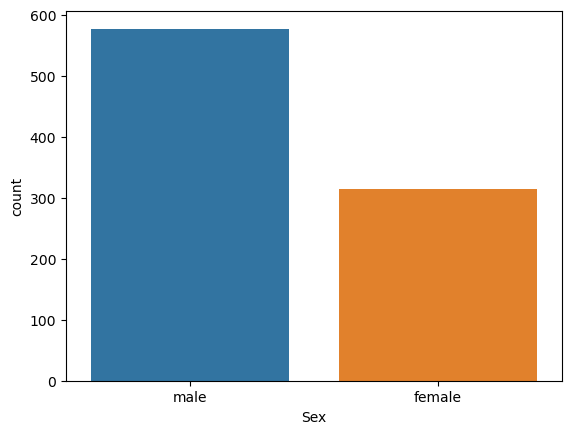

In [134]:
sns.countplot(x=titanic['Sex'])
plt.show()

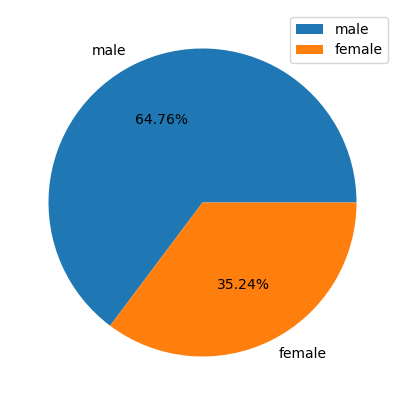

In [135]:
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

In [136]:
titanic['Sex'] = titanic['Sex'].astype(str)
titanic['Survived'] = titanic['Survived'].astype(str)

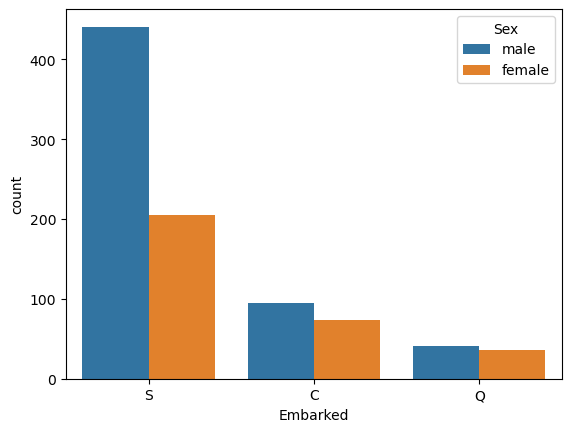

In [137]:

sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

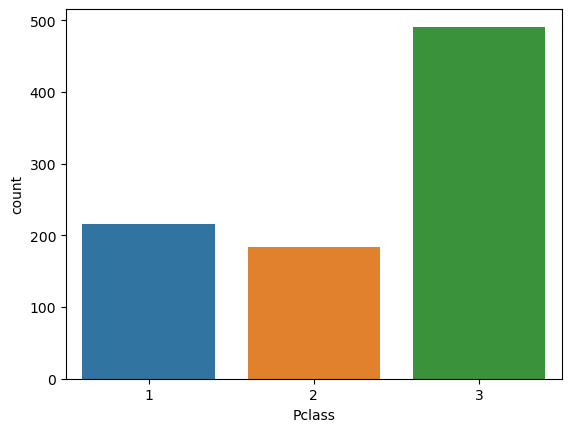

In [138]:
sns.countplot(x=titanic['Pclass'])
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


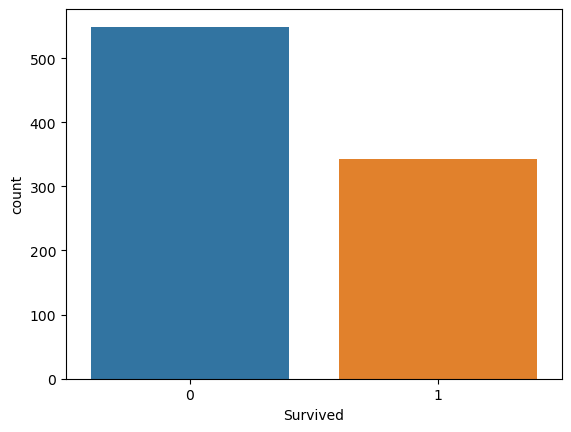

In [139]:
print(titanic['Survived'].value_counts())
sns.countplot(x=titanic['Survived'])
plt.show()

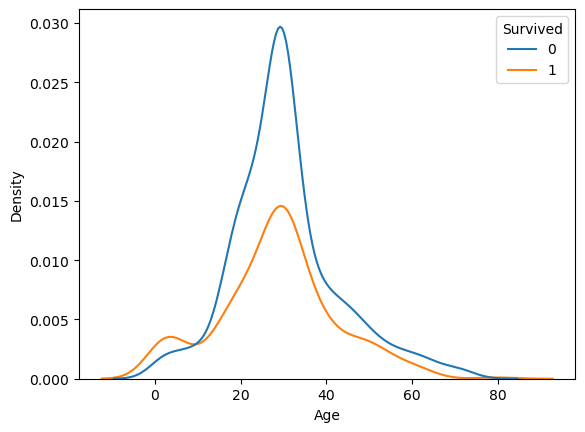

In [140]:
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show()

In [141]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

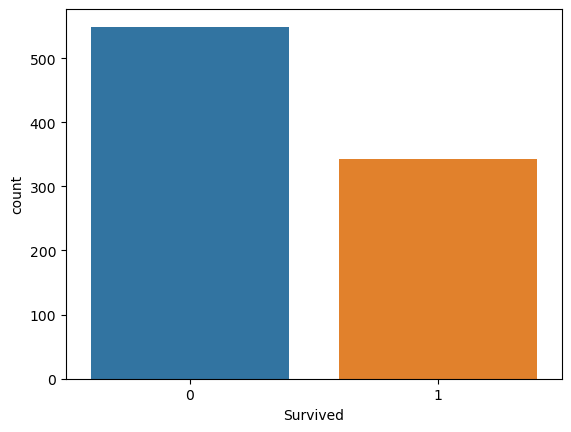

In [142]:
sns.countplot(x=titanic['Survived'])
plt.show()

In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [145]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.shape)
print(y.shape)
print(type(x))  
print(type(y))

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [146]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [147]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: object

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


In [149]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [150]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  
    print('Testing Score',model.score(x_test,y_test))   

In [151]:
mscore(lr)

Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [152]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

['1' '0' '1' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1']


In [153]:
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [154]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [155]:
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [156]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

['1' '0' '1' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0'
 '0' '1' '0' '0' '1' '0' '1' '0' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0'
 '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1']


In [157]:
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


In [158]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [159]:
mscore(knn)

Training Score 0.7752808988764045
Testing Score 0.6777777777777778


In [160]:
ypred_knn = knn.predict(x_test)
print(ypred_knn)

['1' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [161]:
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[47  6]
 [23 14]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.89      0.76        53
           1       0.70      0.38      0.49        37

    accuracy                           0.68        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.68      0.68      0.65        90

Accuracy Score 0.6777777777777778


In [162]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree Classifier','knn'] ,
    'Score' :[acc_lr,acc_dt,acc_knn]})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
2,knn,0.677778


In [163]:
from sklearn.model_selection import GridSearchCV , train_test_split

In [164]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

Best Parameters:  {'C': 0.1, 'penalty': 'l2'}


In [165]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 80.65


In [166]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(x_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 78.88888888888889


Text(0.5, 1.0, 'Confusion Matrix For Best Logistic Regression')

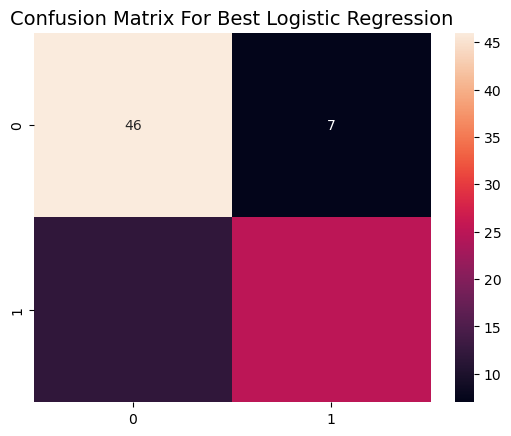

In [167]:
lr_grid_y_pred = Best_Logistic_Regression_Model.predict(x_test)
conf_matrix = confusion_matrix(y_test, lr_grid_y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix For Best Logistic Regression", fontsize=14)